## Cálculos

In [206]:
import dslab as ds
import math as mt
import numpy as np
import pandas
from IPython.display import Image

In [207]:
um = 1e-6
nm = 1e-9

## Lembrando que:
$$ {k_0 = \frac{2\cdot\pi}{{\lambda}_0}}

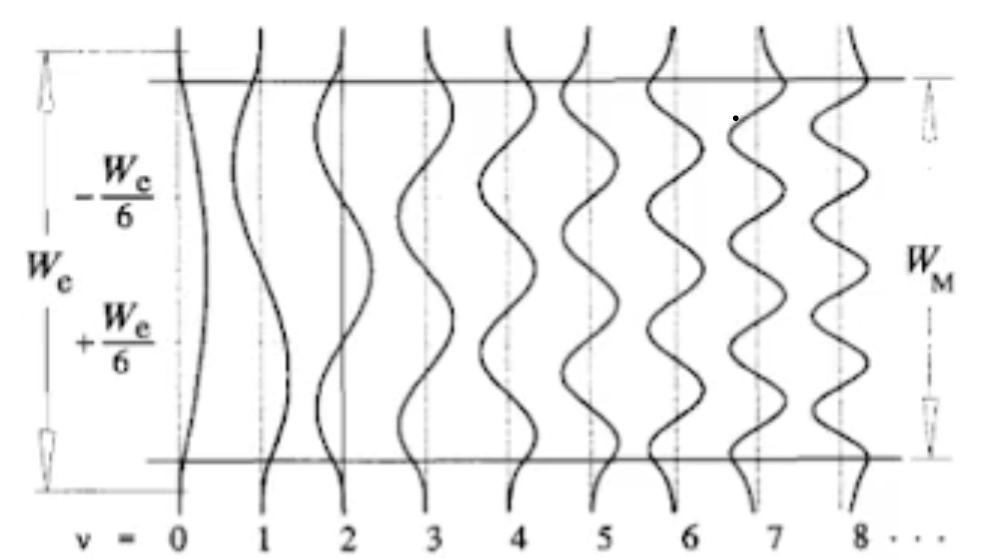

In [208]:
lambda_0 = 1550*nm
n_c = 1.554
n_r = 3.476
k0 = 2*np.pi/lambda_0
wm = 7*um

Image(filename='C:/Users/gson5/Downloads/ERICK TRALHAS/FOTÔNICA/LAB. 9/MMI TEORIA.png')

$$ 
W_e = W_m + \frac{\lambda}{\pi} \left(\frac{n_c}{n_r} \right)^{2 \cdot \sigma} \left( n_r^2 - n_c^2 \right)^{-\frac{1}{2}}
$$

$$
L_\pi = \frac{\pi}{{\beta}_0 - {\beta}_1} \approx \frac{4\cdot n_r \cdot W_e^2}{3 \cdot {\lambda}_0}
$$


In [209]:
sigma = 0 
we = wm + (lambda_0/np.pi)*((n_c/n_r)**(2*sigma))*(n_r**2-n_c**2)**(-0.5)
we/um

7.158679616167491

In [210]:
neff_app = np.zeros(5)
for i in range(5):
    neff_app[i] = n_r - ((i+1)**2 *np.pi*lambda_0)/(we**2*4*n_r*k0)
    k_c = (i+1)*np.pi/we
    print("neff aproximado = %4.3f" %(neff_app[i]))

neff aproximado = 3.474
neff aproximado = 3.469
neff aproximado = 3.461
neff aproximado = 3.449
neff aproximado = 3.434


In [211]:
L_pi_app = np.pi/(neff_app[0]-neff_app[1])/k0
print(L_pi_app/um)

153.23312499951916


In [212]:
betaTE,neffTE,kfTE,alsTE,alcTE,MTE = ds.adguide(n_r,n_c,n_c,lambda_0,wm/2,'TE')
len(betaTE)

29

In [213]:
df = pandas.DataFrame({"beta": betaTE,
                       "neff": neffTE,
                       "kf"  : kfTE,
                       "als" : alsTE,
                       "alc" : alcTE})

df.index.names = ['TE']
df

,beta,neff,kf,als,alc
TE,,,,,
0,1.408371e+07,3.474314,4.388714e+05,1.259637e+07,1.259637e+07
1,1.406319e+07,3.469250,8.777076e+05,1.257342e+07,1.257342e+07
2,1.402891e+07,3.460795,1.316520e+06,1.253507e+07,1.253507e+07
3,1.398079e+07,3.448924,1.755297e+06,1.248119e+07,1.248119e+07
4,1.391869e+07,3.433603,2.194024e+06,1.241158e+07,1.241158e+07
5,1.384242e+07,3.414788,2.632690e+06,1.232599e+07,1.232599e+07
6,1.375176e+07,3.392423,3.071281e+06,1.222409e+07,1.222409e+07
7,1.364643e+07,3.366440,3.509781e+06,1.210548e+07,1.210548e+07
8,1.352610e+07,3.336757,3.948175e+06,1.196967e+07,1.196967e+07


In [214]:
L_pi_app = np.pi/(betaTE[0]-betaTE[1])
print(L_pi_app/um)

153.04919271439806


$$
L = \left (\frac{3 \cdot L_\pi}{4 \cdot N} \right)
$$

## Onde L é o comprimento aproximado. p é a quantidade de portas. N entradas. 

In [215]:
L_pi_1x1 = 3/4*(L_pi_app)
print(L_pi_1x1/um)

114.78689453579854


In [216]:
L_pi_1x3 = 3/8*L_pi_app
print(L_pi_1x3/um)

57.39344726789927


In [217]:
L_pi_2x2 = 3/4*(L_pi_app/2)
print(L_pi_2x2/um)

57.39344726789927


## Simulação

In [218]:
import sys, os, importlib
import numpy as np
import matplotlib.pyplot as plt
from scipy.constants import lambda2nu, nu2lambda, c

from IPython.core.display import HTML
from IPython.core.pylabtools import figsize
from IPython.display import display, Math

HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

figsize(8, 4)

In [219]:
# lumapiFile = "/opt/lumerical/v221/api/python/lumapi.py"
lumapiFile = "C:\\Program Files\\Lumerical\\v221\\api\\python\\lumapi.py"
spec = importlib.util.spec_from_file_location("lumapi", lumapiFile)
lumapi = importlib.util.module_from_spec(spec)
sys.modules["lumapi"] = lumapi
spec.loader.exec_module(lumapi)
emeApi = lumapi.MODE(hide = False)

C:\Program Files\Lumerical\v221\api\python\lumapi.py:796: SyntaxWarning: invalid escape sequence '\s'
  message = re.sub('^(Error:)\s(prompt line)\s[0-9]+:', '', str(rvals[2])).strip()


In [220]:
# Materials
material_Clad = "SiO2 (Glass) - Dispersive & Lossless"
material_Si = "Si (Silicon) - Dispersive & Lossless"
material_CLAD1 = "SiO2 (Glass) - Palik"
material_SI1 = "Si (Silicon) - Palik"

# Add material
matname = material_Si
matReturn = emeApi.getmaterial(material_Si)
if (emeApi.findstring(matReturn, 'is not available') != -1):
    newmaterial = emeApi.addmaterial("Lorentz")
    emeApi.setmaterial(newmaterial, "name", matname)
    emeApi.setmaterial(matname, "Permittivity", 7.98737492)
    emeApi.setmaterial(matname, "Lorentz Linewidth", 1e8)
    emeApi.setmaterial(matname, "Lorentz Resonance", 3.93282466e+15)
    emeApi.setmaterial(matname, "Lorentz Permittivity", 3.68799143)
    emeApi.setmaterial(matname, "color", np.array([0.85, 0, 0, 1])) # red


In [221]:
matname = material_Clad
matReturn = emeApi.getmaterial(material_Clad)
if (emeApi.findstring(matReturn, 'is not available') != -1):
    newmaterial = emeApi.addmaterial("Lorentz")
    emeApi.setmaterial(newmaterial, "name", matname)
    emeApi.setmaterial(matname, "Permittivity", 2.119881)
    emeApi.setmaterial(matname, "Lorentz Linewidth", 1e10)
    emeApi.setmaterial(matname, "Lorentz Resonance", 3.309283e+13)
    emeApi.setmaterial(matname, "Lorentz Permittivity", 49.43721)
    emeApi.setmaterial(matname, "color", np.array([0.5, 0.5, 0.5, 1])) # grey


In [222]:
# Parâmetros do MMI x
L = round(L_pi_2x2/um)*um

# Parâmetros do MMI y
W = wm

# Parâmetros do Taper
W1 = 450*nm
W2 = 1.5*um
LT = 15.0*um

# Parâmetros do guia de onda
wvg_width  = 450*nm
wvg_height = 220*nm

# Comprimento do guia de onda
wvg_length = 4.0*um


In [223]:
# Operação de largura de banda
cband = True
filename = "S_MMI_EME_1x2_%d_um" %(L/um)

# Simulação da Banda C: 1520 - 1575 nm
# Simulação da Banda L: 1555 - 1635 nm
if cband:
    wvlngth_start = 1.520*um
    wvlngth_stop  = 1.575*um
else:
    wvlngth_start = 1.555*um
    wvlngth_stop  = 1.635*um
nmbFrqPnts = 20


In [224]:
# Adicionando grupo de estrutura
emeApi.deleteall()

emeApi.addstructuregroup()
dev_layer = 'GDS_LAYER_35:4'
emeApi.set('name', dev_layer)

# Adicionando retângulo
emeApi.addrect()
emeApi.addtogroup(dev_layer)
emeApi.set('name', 'box')
emeApi.set('x', 0)
emeApi.set('x span', L)
emeApi.set('y', 0)
emeApi.set('y span', W)
emeApi.set('z', wvg_height/2)
emeApi.set('z span', wvg_height)
emeApi.set('material', material_SI1)

# Adicionando tapers lineares
for i in range(4):
    emeApi.addobject('linear_taper')
    emeApi.set('name', 'taper port ' + str(i + 1))
    emeApi.set('thickness', wvg_height)
    emeApi.set('angle_side', 90)
    emeApi.set('width_l', W2)
    emeApi.set('width_r', W1)
    emeApi.set('len', LT)
    emeApi.set('material', material_SI1)
    emeApi.set('x', emeApi.getnamed(f'{dev_layer}::box', 'x max') + LT/2)
    emeApi.set('y', W/6)
    emeApi.set('z', wvg_height/2)

## 01
emeApi.select(f"{dev_layer}::taper port 1")
emeApi.set("width_l", W1)
emeApi.set("width_r", W2)
emeApi.set("x", emeApi.getnamed(f"{dev_layer}::box", "x max") - LT/2 - L)
emeApi.set("y", W/6)

## 04
emeApi.select(f"{dev_layer}::taper port 4")
emeApi.set("width_l", W1)
emeApi.set("width_r", W2)
emeApi.set("x", emeApi.getnamed(f"{dev_layer}::box", "x max") - LT/2 - L)
emeApi.set("y", -W/6)

## 03
emeApi.select(f"{dev_layer}::taper port 3")
emeApi.set("y", -W/6)


In [225]:
## Waveguides
for i in range(4):
    emeApi.select(f"{dev_layer}::port {str(i + 1)}")
    emeApi.delete()

for i in range(4):
    emeApi.addrect()
    emeApi.addtogroup(dev_layer)
    emeApi.set('name', f"port {str(i + 1)}")
    emeApi.set('x', (L + wvg_length + 2 * LT) / 2)
    emeApi.set('x span', wvg_length)
    emeApi.set('y', W / 6)
    emeApi.set('y span', wvg_width)
    emeApi.set('z', wvg_height / 2)
    emeApi.set('z span', wvg_height)
    emeApi.set('material', material_SI1)

## 01
emeApi.select(f"{dev_layer}::port 1")
emeApi.set('x', -(L + wvg_length + 2 * LT) / 2)
emeApi.set('y', -W/6)

## 04
emeApi.select(f"{dev_layer}::port 4")
emeApi.set('x', -(L + wvg_length + 2 * LT) / 2)
emeApi.set('y', W/6)

## 03
emeApi.select(f"{dev_layer}::port 3")
emeApi.set('y', -W / 6)


In [226]:
emeApi.select("EME")
emeApi.delete()

## Add solver
emeApi.addeme()

bound_x_offset = 0.5*um
bound_y_offset = 2*um
bound_z_offset = 0.5*um

port_y_span = 2*um
port_z_span = 2*um

## Dimensions
emeApi.set('x', 0)
emeApi.set(
    'x min', bound_x_offset + emeApi.getnamed(f'{dev_layer}::port 1', "x min")
)
emeApi.set('y', 0*um)
emeApi.set('y span', W + 2*bound_y_offset)
emeApi.set('z', wvg_height/2)
emeApi.set('z span', 3.5*um)

## Background material
emeApi.set('background material', material_CLAD1)


In [227]:

## Transcription
cell_wgd = 1
cell_taper = 16
cell_box = 1

span_wgd = wvg_length-2*bound_x_offset
span_taper = LT
span_box = L

method_wgd = 0 # 0 = none, 1 = CVCS
method_taper = 1
method_box = 0

modes_wgd = 4
modes_taper = 10
modes_box = 32

## Set cell properties
emeApi.set("number of cell groups", 5)
emeApi.set("group spans", np.block([[span_wgd], [span_taper], [span_box], [span_taper], [span_wgd]]))
emeApi.set("cells", np.block([[cell_wgd], [cell_taper], [cell_box], [cell_taper], [cell_wgd]]))
emeApi.set("subcell method", np.block([[method_wgd], [method_taper], [method_box], [method_taper], [method_wgd]]))
emeApi.set("allow custom eigensolver settings", True)
emeApi.set("modes", np.block([[modes_wgd], [modes_taper], [modes_box], [modes_taper], [modes_taper]]))
emeApi.set("display cells", 1)

## Number of mesh cells without override regions
emeApi.set("mesh cells y", 200)
emeApi.set("mesh cells z", 200)

## Boundary Conditions
emeApi.set("y min bc", "PML")
emeApi.set("y max bc", "PML")
emeApi.set("z min bc", "Symmetric")
emeApi.set("z max bc", "PML")


In [228]:
for i in range (4):
    emeApi.select(f"EME::Ports::port_{i+2}")
    emeApi.delete()

emeApi.select("TAPPER 1")
emeApi.delete()

emeApi.select("TAPPER 2")
emeApi.delete()

## Configura as portas
emeApi.select("EME::Ports::port_1")
emeApi.set("use full simulation span", 0)
emeApi.set("port location", "left")
emeApi.set("y", W/6)
emeApi.set("y span", port_y_span)
emeApi.set("z", 0)
emeApi.set("z span", port_z_span)
emeApi.set("mode selection", "fundamental TE mode")

emeApi.addemeport()
emeApi.set("use full simulation span", 0)
emeApi.set("port location", "right")
emeApi.set("y", W/6)
emeApi.set("y span", port_y_span)
emeApi.set("z", 0)
emeApi.set("z span", port_z_span)
emeApi.set("mode selection", "fundamental TE mode")

emeApi.addemeport()
emeApi.set("use full simulation span", 0)
emeApi.set("port location", "left")
emeApi.set("y", -W/6)
emeApi.set("y span", port_y_span)
emeApi.set("z", 0)
emeApi.set("z span", port_z_span)
emeApi.set("mode selection", "fundamental TE mode")

emeApi.addemeport()
emeApi.set("use full simulation span", 0)
emeApi.set("port location", "right")
emeApi.set("y", -W/6)
emeApi.set("y span", port_y_span)
emeApi.set("z", 0)
emeApi.set("z span", port_z_span)
emeApi.set("mode selection", "fundamental TE mode")


In [229]:
emeApi.select("TAPPER 1")
emeApi.delete()

emeApi.addmesh()
emeApi.set("name","TAPPER 1")
emeApi.set("set mesh multiplier", 1)
emeApi.set("x mesh multiplier", 3.5)
emeApi.set("y mesh multiplier", 3.5)
emeApi.set("override z mesh", 0)
emeApi.set("x", 0)
emeApi.set("x span", L + LT*2)
emeApi.set("y", 0)
emeApi.set("y span", W*1)
emeApi.set("z", wvg_height/2)



In [230]:
## Adicionar monitor
emeApi.select("profile")
emeApi.delete()

emeApi.addemeprofile()
emeApi.set("name", "profile")
emeApi.set("monitor type", 3)  # 2D-z-normal
emeApi.set("x", 0*um)
emeApi.set("x span", emeApi.getnamed("EME", "x span"))
emeApi.set("y", 0*um)
emeApi.set("y span", W + 2*bound_y_offset)
emeApi.set("z", wvg_height/2)


In [231]:
emeApi.save("LAB. 9")
emeApi.run()

## EME Propagate e Perfil de Campo

In [232]:
emeApi.emepropagate()

In [233]:
# Field profile
E = emeApi.getresult("profile", "field profile")

x = E['x']
x = x[:,0]/um

y = E['y']
y = y[:,0]/um
z = E['z']
E = E['E']

Ex = E[:,:,0,:,0]
Ey = E[:,:,0,:,1]
Ez = E[:,:,0,:,2]

Emag = np.sqrt(np.abs(Ex)**2 + np.abs(Ey)**2 + np.abs(Ez)**2)


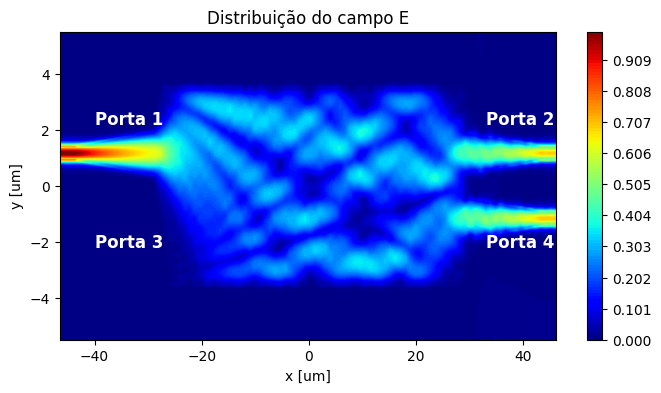

In [234]:
plt.figure()
mycmap = plt.get_cmap('jet')

v = np.linspace(0, 1, 100, endpoint=True)

plt.contourf(x, y, np.transpose(Emag[:,:,0]), v, cmap=mycmap)
plt.colorbar()

plt.title('Distribuição do campo E', fontsize=12)
plt.ylabel('y [um]', fontsize=10)
plt.xlabel('x [um]', fontsize=10)

plt.text(-40, 2.2, 'Porta 1', fontsize=12, fontweight='bold', color='w')
plt.text(33, -2.2, 'Porta 4', fontsize=12, fontweight='bold', color='w')
plt.text(33, 2.2, 'Porta 2', fontsize=12, fontweight='bold', color='w')
plt.text(-40, -2.2, 'Porta 3', fontsize=12, fontweight='bold', color='w')

plt.savefig("ESCALA LINEAR E EME")


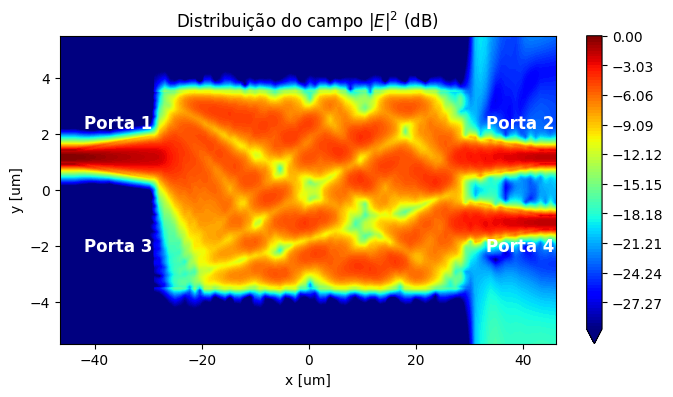

In [235]:
plt.figure()
v = np.linspace(-30, 0, 100, endpoint=True)

plt.title(r'Distribuição do campo $|E|^2$ (dB)', fontsize=12)
plt.ylabel(r'y [um]', fontsize=10)
plt.xlabel(r'x [um]', fontsize=10)

CS = plt.contourf(x, y, 10*np.log10(np.transpose(Emag[:, :,0])), v, cmap=mycmap, extend='min')
plt.colorbar()

plt.text(-42, 2.2, 'Porta 1', fontsize=12, fontweight='bold', color='w')
plt.text(33, -2.2, 'Porta 4', fontsize=12, fontweight='bold', color='w')
plt.text(33, 2.2, 'Porta 2', fontsize=12, fontweight='bold', color='w')
plt.text(-42, -2.2, 'Porta 3', fontsize=12, fontweight='bold', color='w')

plt.savefig("ESCALA LOG E EME")


## Propagation Sweep

In [236]:
emeApi.setemeanalysis('propagation sweep', 1)
emeApi.setemeanalysis('parameter', 'group span 3')
emeApi.setemeanalysis('start', 0.9*span_box)
emeApi.setemeanalysis('stop', 1.1*span_box)
emeApi.setemeanalysis('number of points', nmbFrqPnts*10)

emeApi.emesweep('propagation sweep')

S = emeApi.getemesweep('S')
group_span = S['group_span_3']

T1 = np.abs(S['s11'])**2
T2 = np.abs(S['s31'])**2
T3 = np.abs(S['s21'])**2
T4 = np.abs(S['s41'])**2

T1_dB = 10*np.log10(T1)
T2_dB = 10*np.log10(T2)
T3_dB = 10*np.log10(T3)
T4_dB = 10*np.log10(T4)


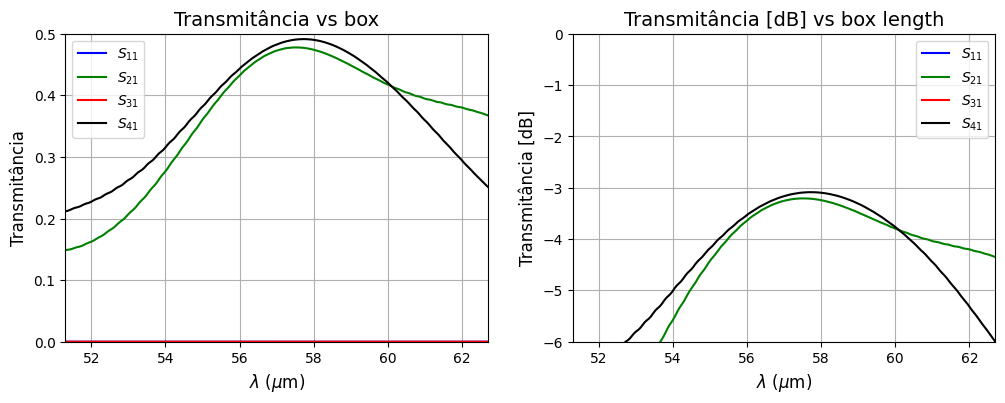

In [237]:
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

axs[0].plot(group_span/um, T1, 'b', lw=1.5, label='$S_{11}$')
axs[0].plot(group_span/um, T2, 'g', lw=1.5, label='$S_{21}$')
axs[0].plot(group_span/um, T3, 'r', lw=1.5, label='$S_{31}$')
axs[0].plot(group_span/um, T4, 'k', lw=1.5, label='$S_{41}$')
axs[0].set_xlabel(r'$\lambda$ ($\mu$m)', fontsize=12)
axs[0].set_ylabel('Transmitância', fontsize=12)
axs[0].set_title('Transmitância vs box', fontsize=14)
axs[0].set_xlim([0.9*span_box/um, 1.1*span_box/um])
axs[0].set_ylim([0, 0.5])
axs[0].grid()
axs[0].legend()

axs[1].plot(group_span/um, T1_dB, 'b', lw=1.5, label='$S_{11}$')
axs[1].plot(group_span/um, T2_dB, 'g', lw=1.5, label='$S_{21}$')
axs[1].plot(group_span/um, T3_dB, 'r', lw=1.5, label='$S_{31}$')
axs[1].plot(group_span/um, T4_dB, 'k', lw=1.5, label='$S_{41}$')
axs[1].set_xlabel(r'$\lambda$ ($\mu$m)', fontsize=12)
axs[1].set_ylabel('Transmitância [dB]', fontsize=12)
axs[1].set_title('Transmitância [dB] vs box length', fontsize=14)
axs[1].set_xlim([0.9*span_box/um, 1.1*span_box/um])
axs[1].set_ylim([-6, 0])
axs[1].grid()
axs[1].legend()

plt.savefig("T VS BOX")

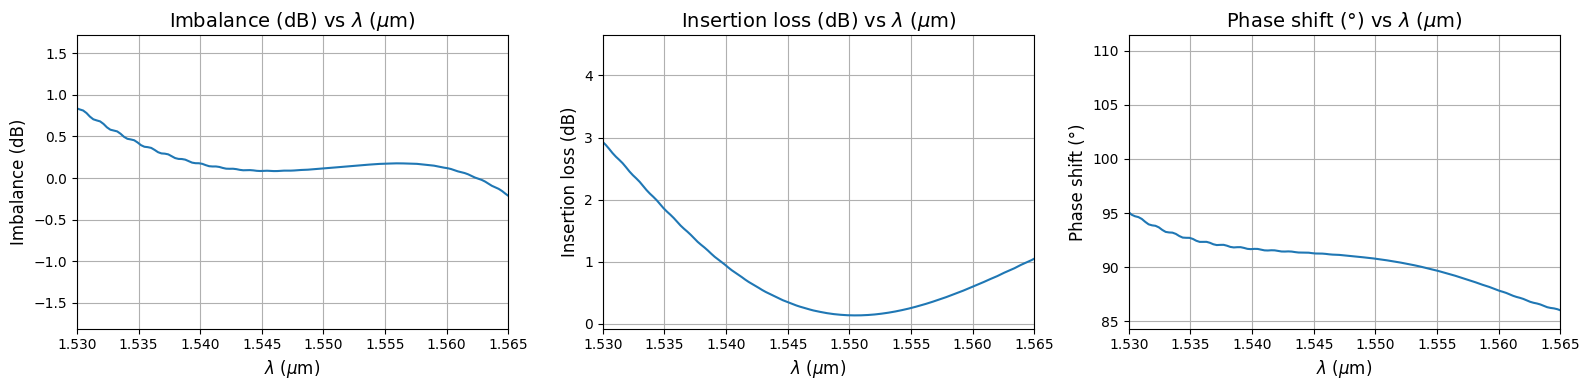

In [ ]:
fig,axs = plt.subplots(1, 3, figsize=(16,4))

### Imbalance
Ib = T4_dB - T2_dB
axs[0].plot(Lambda/um, Ib, lw=1.5)
axs[0].set_xlabel(r'$\lambda$ ($\mu$m)', fontsize=12)
axs[0].set_ylabel(r'Imbalance (dB)', fontsize=12)
axs[0].set_title(r'Imbalance (dB) vs $\lambda$ ($\mu$m)', fontsize=14)
axs[0].set_xlim([1.53, 1.565])
axs[0].grid()

### Insertion Loss
IL = -10 * np.log10(T4 + T2)
axs[1].plot(Lambda/um, IL, lw=1.5)
axs[1].set_xlabel(r'$\lambda$ ($\mu$m)', fontsize=12)
axs[1].set_ylabel(r'Insertion loss (dB)', fontsize=12)
axs[1].set_title(r'Insertion loss (dB) vs $\lambda$ ($\mu$m)', fontsize=14)
axs[1].set_xlim([1.53, 1.565])
axs[1].grid()

### Phase Shift
phi1 = np.angle(S['s41'])
phi2 = np.angle(S['s31'])

phase = (phi1 - phi2) * (180 / np.pi)

for p in range(len(phase)):
    if abs(phase[p]) > 200:
        phase[p] = phase[p] + 360

axs[2].plot( /um, phase, lw=1.5)
axs[2].set_xlabel(r'$\lambda$ ($\mu$m)', fontsize=12)
axs[2].set_ylabel(r'Phase shift (°)', fontsize=12)
axs[2].set_title(r'Phase shift (°) vs $\lambda$ ($\mu$m)', fontsize=14)
axs[2].set_xlim([1.53, 1.565])
axs[2].grid()

plt.tight_layout()

plt.savefig("IMBALANCE, IL, PS")

## Wavelenght Sweep

In [239]:
emeApi.setemeanalysis("group spans", np.block([[span_wgd], [span_taper], [57.8*um], [span_taper], [span_wgd]]))

emeApi.setemeanalysis('wavelength sweep', 1)
emeApi.setemeanalysis('start wavelength', wvlngth_start)
emeApi.setemeanalysis('stop wavelength', wvlngth_stop)
emeApi.setemeanalysis('number of wavelength points', nmbFrqPnts*10)
emeApi.setemeanalysis('calculate group delays', 1)


In [240]:
emeApi.emesweep('wavelength sweep')
S = emeApi.getemesweep('S_wavelength_sweep')
Lambda = S['wavelength']

T1 = np.abs(S['s11'])**2
T2 = np.abs(S['s31'])**2
T3 = np.abs(S['s21'])**2
T4 = np.abs(S['s41'])**2

T1_dB = 10*np.log10(T1)
T2_dB = 10*np.log10(T2)
T3_dB = 10*np.log10(T3)
T4_dB = 10*np.log10(T4)


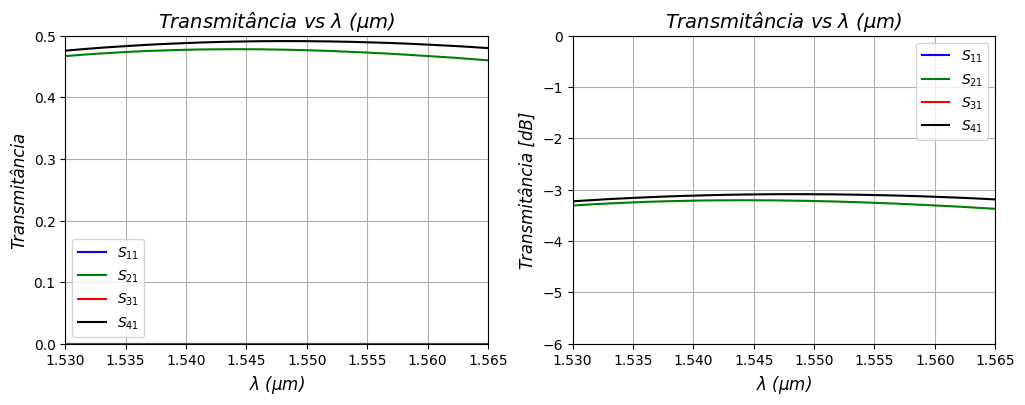

In [241]:
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

axs[0].plot(Lambda/um, T1, 'b', lw=1.5, label='$S_{11}$')
axs[0].plot(Lambda/um, T2, 'g', lw=1.5, label='$S_{21}$')
axs[0].plot(Lambda/um, T3, 'r', lw=1.5, label='$S_{31}$')
axs[0].plot(Lambda/um, T4, 'k', lw=1.5, label='$S_{41}$')
axs[0].set_xlabel(r'$\lambda$ ($\mu$m)', fontsize=12, fontstyle='italic')
axs[0].set_ylabel('Transmitância', fontsize=12, fontstyle='italic')
axs[0].set_title(r'Transmitância vs $\lambda$ ($\mu$m)', fontsize=14, fontstyle='italic')
axs[0].set_xlim([1.53, 1.565])
axs[0].set_ylim([0, 0.5])
axs[0].grid()
axs[0].legend()

axs[1].plot(Lambda/um, T1_dB, 'b', lw=1.5, label='$S_{11}$')
axs[1].plot(Lambda/um, T2_dB, 'g', lw=1.5, label='$S_{21}$')
axs[1].plot(Lambda/um, T3_dB, 'r', lw=1.5, label='$S_{31}$')
axs[1].plot(Lambda/um, T4_dB, 'k', lw=1.5, label='$S_{41}$')
axs[1].set_xlabel(r'$\lambda$ ($\mu$m)', fontsize=12, fontstyle='italic')
axs[1].set_ylabel('Transmitância [dB]', fontsize=12, fontstyle='italic')
axs[1].set_title(r'Transmitância vs $\lambda$ ($\mu$m)', fontsize=14, fontstyle='italic')
axs[1].set_xlim([1.53, 1.565])
axs[1].set_ylim([-6, 0])
axs[1].grid()
axs[1].legend()

plt.savefig("T VS LAMBDA")

## O imbalance refere-se ao desajuste na amplitude ou fase dos modos que interferem dentro do dispositivo, afetando a distribuição de potência ou a coerência da fase nas saídas.

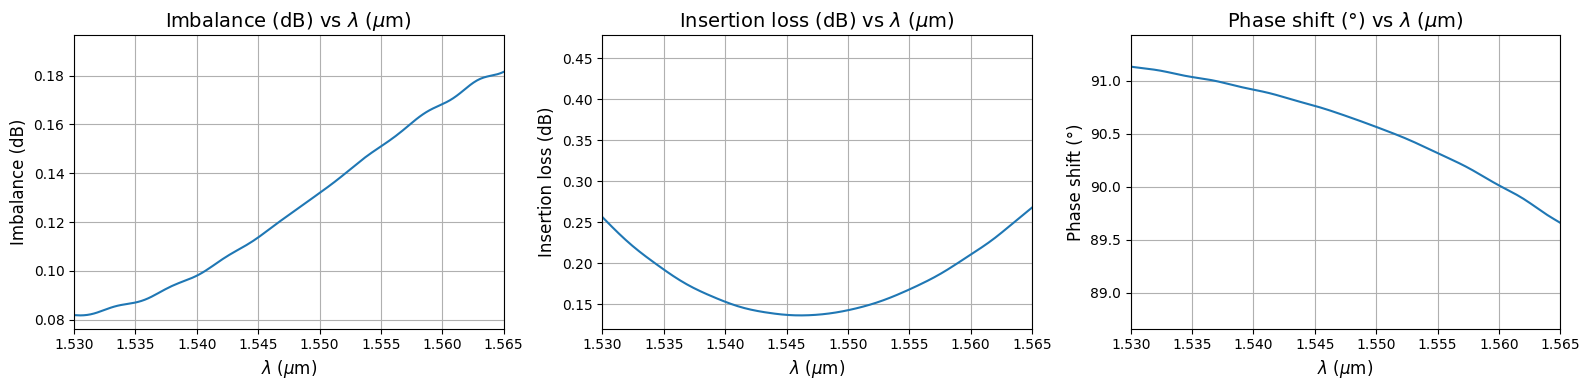

In [242]:
fig,axs = plt.subplots(1, 3, figsize=(16,4))

### Imbalance
Ib = T4_dB - T2_dB
axs[0].plot(Lambda/um, Ib, lw=1.5)
axs[0].set_xlabel(r'$\lambda$ ($\mu$m)', fontsize=12)
axs[0].set_ylabel(r'Imbalance (dB)', fontsize=12)
axs[0].set_title(r'Imbalance (dB) vs $\lambda$ ($\mu$m)', fontsize=14)
axs[0].set_xlim([1.53, 1.565])
axs[0].grid()

### Insertion Loss
IL = -10 * np.log10(T4 + T2)
axs[1].plot(Lambda/um, IL, lw=1.5)
axs[1].set_xlabel(r'$\lambda$ ($\mu$m)', fontsize=12)
axs[1].set_ylabel(r'Insertion loss (dB)', fontsize=12)
axs[1].set_title(r'Insertion loss (dB) vs $\lambda$ ($\mu$m)', fontsize=14)
axs[1].set_xlim([1.53, 1.565])
axs[1].grid()

### Phase Shift
phi1 = np.angle(S['s41'])
phi2 = np.angle(S['s31'])

phase = (phi1 - phi2) * (180 / np.pi)

for p in range(len(phase)):
    if abs(phase[p]) > 200:
        phase[p] = phase[p] + 360

axs[2].plot(Lambda/um, phase, lw=1.5)
axs[2].set_xlabel(r'$\lambda$ ($\mu$m)', fontsize=12)
axs[2].set_ylabel(r'Phase shift (°)', fontsize=12)
axs[2].set_title(r'Phase shift (°) vs $\lambda$ ($\mu$m)', fontsize=14)
axs[2].set_xlim([1.53, 1.565])
axs[2].grid()

plt.tight_layout()

plt.savefig("IMBALANCE, IL, PS")

## Novo perfil de campo

In [243]:
emeApi.emepropagate()

In [244]:
# Field profile
E = emeApi.getresult("profile", "field profile")

x = E['x']
x = x[:,0]/um

y = E['y']
y = y[:,0]/um
z = E['z']
E = E['E']

Ex = E[:,:,0,:,0]
Ey = E[:,:,0,:,1]
Ez = E[:,:,0,:,2]

Emag = np.sqrt(np.abs(Ex)**2 + np.abs(Ey)**2 + np.abs(Ez)**2)


Text(-42, -2.2, 'Porta 3')

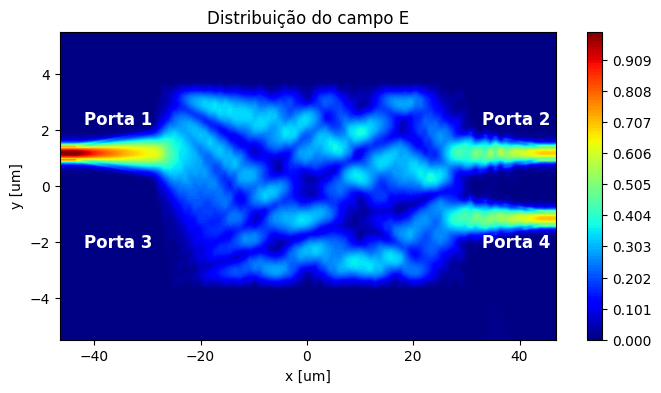

In [245]:
plt.figure()
mycmap = plt.get_cmap('jet')

v = np.linspace(0, 1, 100, endpoint=True)

plt.contourf(x, y, np.transpose(Emag[:,:,0]), v, cmap=mycmap)
plt.colorbar()

plt.title('Distribuição do campo E', fontsize=12)
plt.ylabel('y [um]', fontsize=10)
plt.xlabel('x [um]', fontsize=10)

plt.text(-42, 2.2, 'Porta 1', fontsize=12, fontweight='bold', color='w')
plt.text(33, -2.2, 'Porta 4', fontsize=12, fontweight='bold', color='w')
plt.text(33, 2.2, 'Porta 2', fontsize=12, fontweight='bold', color='w')
plt.text(-42, -2.2, 'Porta 3', fontsize=12, fontweight='bold', color='w')

Text(-42, -2.2, 'Porta 3')

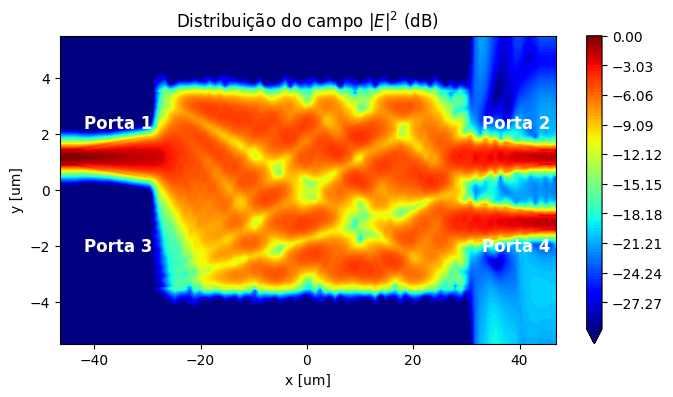

In [246]:
plt.figure()
v = np.linspace(-30, 0, 100, endpoint=True)

plt.title(r'Distribuição do campo $|E|^2$ (dB)', fontsize=12)
plt.ylabel(r'y [um]', fontsize=10)
plt.xlabel(r'x [um]', fontsize=10)

CS = plt.contourf(x, y, 10*np.log10(np.transpose(Emag[:, :,0])), v, cmap=mycmap, extend='min')
plt.colorbar()

plt.text(-42, 2.2, 'Porta 1', fontsize=12, fontweight='bold', color='w')
plt.text(33, -2.2, 'Porta 4', fontsize=12, fontweight='bold', color='w')
plt.text(33, 2.2, 'Porta 2', fontsize=12, fontweight='bold', color='w')
plt.text(-42, -2.2, 'Porta 3', fontsize=12, fontweight='bold', color='w')